<a href="https://colab.research.google.com/github/ashmithareddy20/23CSBTB39-40/blob/main/STML_A_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report


In [4]:
file_path = ("pass_fail_data.csv")
df = pd.read_csv(file_path)


In [5]:
print("Data Preview:")
print(df.head())

Data Preview:
   Study Hours per Week  Class Attendance (%)  Previous Exam Score (%)  \
0                    10                    90                       85   
1                     5                    60                       70   
2                    15                    95                       90   
3                     2                    30                       50   
4                    12                    85                       88   

   Participation in Group Study  Submission of Assignments (%)  Pass/Fail  
0                             1                            100          1  
1                             0                             80          0  
2                             1                            100          1  
3                             0                             40          0  
4                             1                             90          1  


In [6]:
print("\nData Shape:")
print(df.shape)


Data Shape:
(10, 6)


In [7]:
print("\nData Description:")
print(df.describe())


Data Description:
       Study Hours per Week  Class Attendance (%)  Previous Exam Score (%)  \
count             10.000000             10.000000                10.000000   
mean               8.600000             73.000000                73.600000   
std                4.526465             21.390548                15.629033   
min                2.000000             30.000000                50.000000   
25%                5.250000             61.250000                61.250000   
50%                9.000000             80.000000                75.000000   
75%               11.750000             89.500000                87.250000   
max               15.000000             95.000000                93.000000   

       Participation in Group Study  Submission of Assignments (%)  Pass/Fail  
count                     10.000000                       10.00000  10.000000  
mean                       0.500000                       79.50000   0.500000  
std                        0.527046   

In [8]:
print("\nPass/Fail Value Counts:")
print(df['Pass/Fail'].value_counts())


Pass/Fail Value Counts:
Pass/Fail
1    5
0    5
Name: count, dtype: int64


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

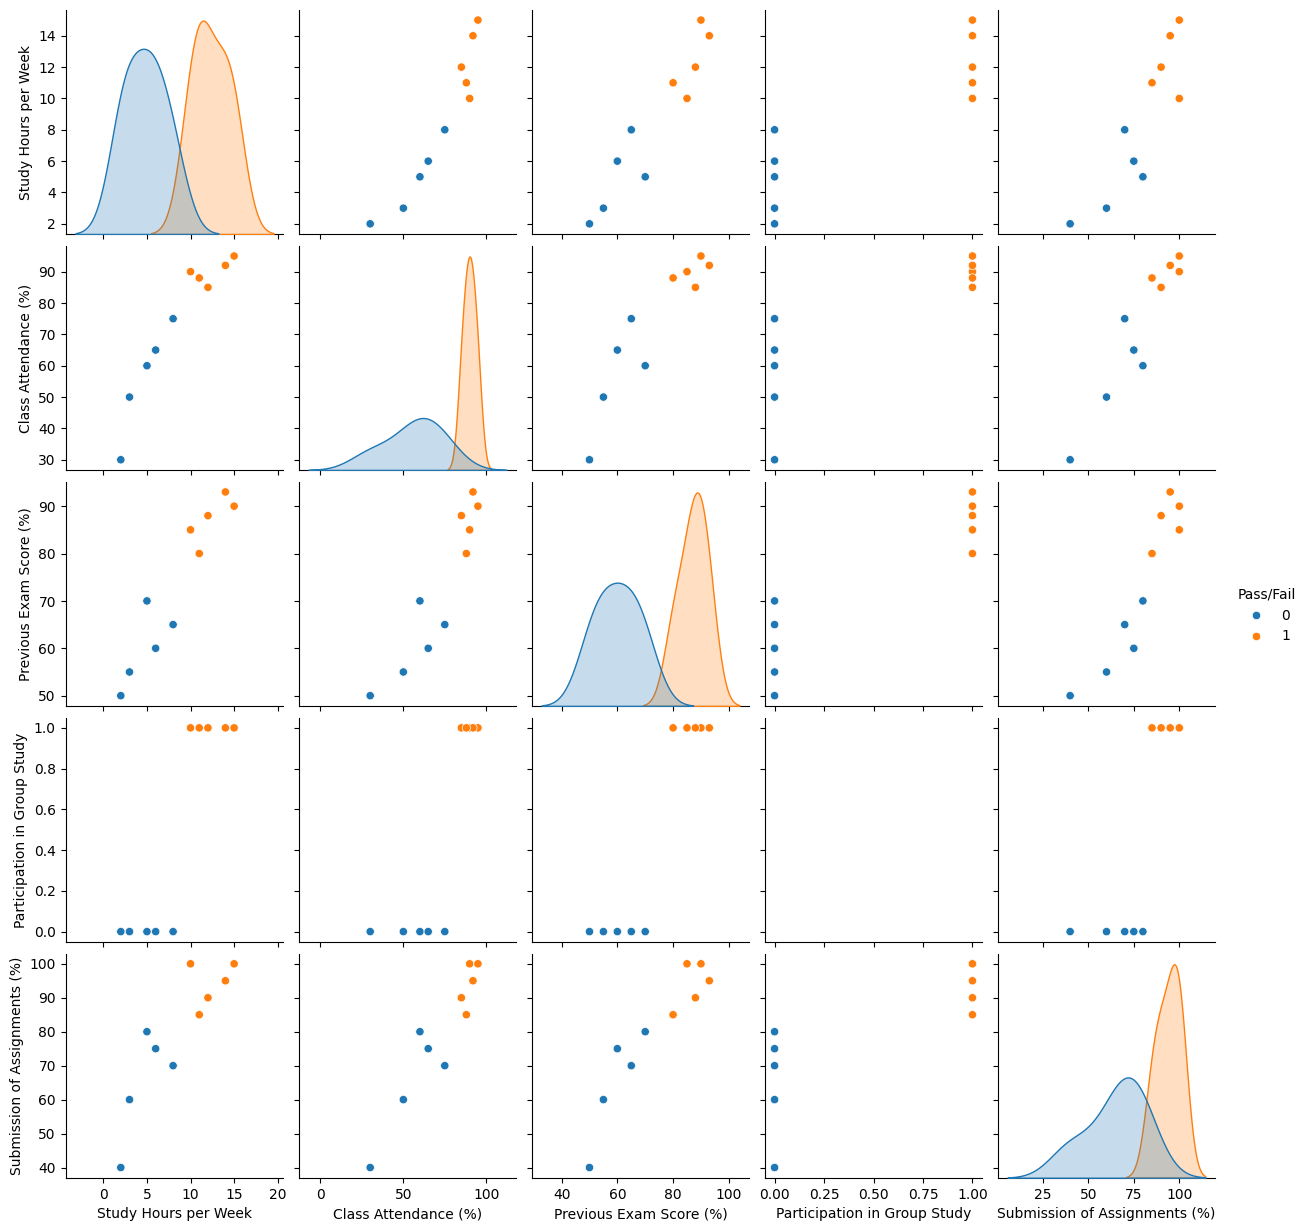

In [9]:
sns.pairplot(df, hue='Pass/Fail')
plt.show()

In [10]:
X = df.drop('Pass/Fail', axis=1)
y = df['Pass/Fail']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("\nModel Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))



Model Accuracy: 1.0

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [22]:
df = pd.read_csv("diabetes_data_upload.csv")

In [23]:
df = df.dropna()

label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])

for column in df.columns:
    if df[column].isin(['Yes', 'No']).any():
        df[column] = label_encoder.fit_transform(df[column])

X = df.drop('class', axis=1)
y = df['class']


In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

logistic_model = LogisticRegression(max_iter=1000, random_state=42)
logistic_model.fit(X_train, y_train)

y_pred = logistic_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Model accuracy: {accuracy * 100:.2f}%")


Model accuracy: 93.59%
